# Q2 a)

In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Preprocessing dataset

In [2]:
df = pd.read_csv("voice.csv")

features = df.drop(columns=["label"]).values
labels = df["label"].values

label_map = {"male": 0, "female": 1}

labels = [label_map[label] for label in labels]
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, num_classes=2)

# for pytorch:
label = torch.tensor(labels, dtype=torch.float)
data = torch.tensor(features, dtype=torch.float)

# Class for a 1D convolutional neural network

In [9]:
class Conv1DNN(nn.Module):
    def __init__(self):
        super(Conv1DNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 5, stride=1)
        self.fc1 = nn.Linear(512, 2)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = torch.flatten(x)

        # print(x.shape)
        # x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc1(x))
        # print(x)
        return x

# Making a model from the neural network

In [10]:
model = Conv1DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
arr_t_acc = []
arr_v_acc = []
arr_t_loss = []
arr_v_loss = []

# Training the neural network 

In [12]:
def train_conv(x, y, val_d, val_l, num_epochs=60):
    for epoch in range(num_epochs):
        model.train()
        total_correct = 0
        total_samples = 0
        t_loss = 0.0
        for j in range(len(x)):
            optimizer.zero_grad()

            outputs = model(x[j].unsqueeze(0))

            loss = criterion(outputs, y[j])
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

            predicted = torch.round(outputs)

            total_correct += (predicted == y[j]).sum().item()
            total_samples += y[j].size(0)
        t_loss /= len(x)

        correct = 0
        total = 0
        v_loss = 0.0
        with torch.no_grad():
            for j in range(len(val_d)):
                outputs = model(val_d[j].unsqueeze(0))
                loss = criterion(outputs, y[j])
                v_loss += loss.item()
                predicted = torch.round(outputs)
                total += val_l[j].size(0)
                correct += (predicted == val_l[j]).sum().item()
        v_loss /= len(val_d)

        v_acc = 100 * correct / total

        t_acc = 100 * total_correct / total_samples
        arr_t_acc.append(t_acc)
        arr_v_acc.append(v_acc)
        arr_t_loss.append(t_loss)
        arr_v_loss.append(v_loss)
        print(
            f'Epoch {epoch + 1}: Train Accuracy = {t_acc:.2f}%, Validation Accuracy = {v_acc:.2f}%, Train Loss: {t_loss:.4f}, validation Loss: {v_loss:.4f}')


In [13]:
# print(data.shape)
t_and_v_data, test_data, t_and_v_labels, test_labels = train_test_split(data, label, test_size=0.2)
train_data, val_data, train_labels, val_labels = train_test_split(t_and_v_data, t_and_v_labels, test_size=0.2)
train_conv(train_data, train_labels, val_data, val_labels)

Epoch 1: Train Accuracy = 51.53%, Validation Accuracy = 51.08%, Train Loss: 0.6842, validation Loss: 0.6967
Epoch 2: Train Accuracy = 54.49%, Validation Accuracy = 55.33%, Train Loss: 0.6691, validation Loss: 0.7201
Epoch 3: Train Accuracy = 56.17%, Validation Accuracy = 55.92%, Train Loss: 0.6659, validation Loss: 0.7741
Epoch 4: Train Accuracy = 55.72%, Validation Accuracy = 54.24%, Train Loss: 0.6741, validation Loss: 0.7133
Epoch 5: Train Accuracy = 57.62%, Validation Accuracy = 58.97%, Train Loss: 0.6551, validation Loss: 0.7379
Epoch 6: Train Accuracy = 58.24%, Validation Accuracy = 50.00%, Train Loss: 0.6518, validation Loss: 0.6929
Epoch 7: Train Accuracy = 61.49%, Validation Accuracy = 66.77%, Train Loss: 0.6191, validation Loss: 0.7607
Epoch 8: Train Accuracy = 68.30%, Validation Accuracy = 67.36%, Train Loss: 0.5810, validation Loss: 0.7854
Epoch 9: Train Accuracy = 70.70%, Validation Accuracy = 71.30%, Train Loss: 0.5647, validation Loss: 0.7966
Epoch 10: Train Accuracy = 6

# Plotting the results 

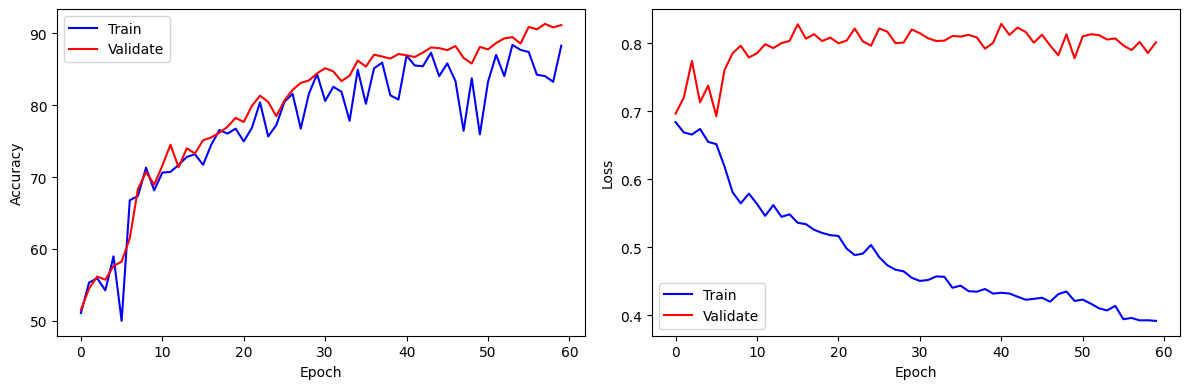

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(arr_v_acc, label='Train', color='blue')
plt.plot(arr_t_acc, label='Validate', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(arr_t_loss, label='Train', color='blue')
plt.plot(arr_v_loss, label='Validate', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Q2 b)

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, AvgPool2D, GlobalAveragePooling2D, MaxPool2D, ReLU, concatenate

from tensorflow.keras.applications import DenseNet121

# Changing the dataset to image format

In [4]:
shaped_data = features.reshape(features.shape[0], 4, 5, 1)
# print(shaped_data.shape)
images = []
for i in range(len(shaped_data)):
    image = array_to_img(shaped_data[i])
    image = image.resize((32, 32))
    image = image.convert('RGB')
    image = img_to_array(image)
    # print(image)
    images.append(image)

images = np.array(images)

In [5]:
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K# Creating Densenet121

def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

input_shape = 32, 32, 3
n_classes = 2

model = densenet(input_shape,n_classes)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
h = model.fit(images , labels, epochs=20, batch_size=32, validation_split=0.2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 64)  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 8, 8, 64)  │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 128) │      8,320 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 32)  │     36,896 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 8, 96)  │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │                   │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 128) │     12,416 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 32)  │     36,896 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 8, 8, 128) │          0 │ conv2d_4[0][0],   │
│ (Concatenate)       │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 128) │     16,512 │ re_lu_4[0][0]   

 Total params: 7,045,442 (26.88 MB)

 Trainable params: 6,963,970 (26.57 MB)

 Non-trainable params: 81,472 (318.25 KB)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.5933 - loss: 1.4279 - val_accuracy: 0.0000e+00 - val_loss: 9.1367
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.6912 - loss: 0.6426 - val_accuracy: 0.9148 - val_loss: 0.3269
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6676 - loss: 0.7108 - val_accuracy: 0.5584 - val_loss: 0.7163
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.7395 - loss: 0.5813 - val_accuracy: 0.7744 - val_loss: 0.5722
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7449 - loss: 0.5297 - val_accuracy: 0.5268 - val_loss: 0.7937
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.7422 - loss: 0.5421 - val_accuracy: 0.7350 - val_loss: 0.5047
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.7852 - loss: 0.5017 - val_accuracy: 0.3360 - val_loss: 1.1607
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.7930 - loss: 0.4667 - val_accura

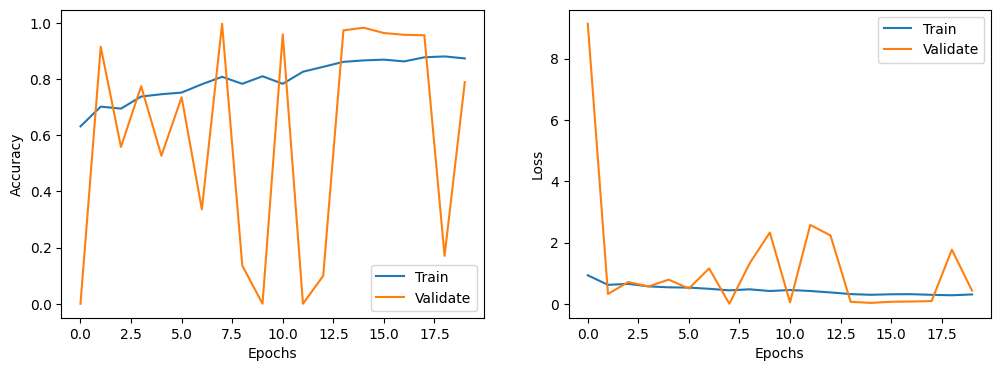

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Train')
plt.plot(h.history['val_accuracy'], label='Validate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train')
plt.plot(h.history['val_loss'], label='Validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()